In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
class Ecommerce:
  def __init__(self,csv_file_path):
    self.df = pd.read_csv(csv_file_path)

  def get_data(self):
    return self.df

  def show_info(self):
        return self.df.info(),self.df.isnull().sum()

  def top_service_rating_customer_id(self):
    service_rating_customer_id =self.df.sort_values(by= 'Service Rating',ascending=False).head(5)
    return service_rating_customer_id

  def order_value_per_category(self):
    order_value= self.df.groupby('Product Category')['Order Value (INR)'].sum()
    return order_value

  def top10_worst_customer_feedback(self):
    return  self.df.sort_values(by = 'Service Rating' , ascending = True)[['Platform' ,'Customer Feedback']]. head(10)

  def worst_feedback_for_each_platform(self):
    self.df[self.df['Rating']<= 1]
    return self.df.groupby('Platform')['Customer Feedback'].value_counts()

  def repeated_customer_count(self):
    customer_counts = self.df['Customer ID'].value_counts()
    repeated_customers = customer_counts[customer_counts > 1].index
    repeated_df = self.df[self.df['Customer ID'].isin(repeated_customers)]
    return repeated_df.groupby('Platform')['Customer ID'].nunique().sort_values(ascending=False)

  def late_delivery_count(self):
    late_delivery_count =self.df[self.df['Delivery Delay']== 'Yes'].groupby('Platform').size().sort_values(ascending=False)
    return late_delivery_count

  def shortest_delivery_time(self):
    shortest_delivery_time = self.df.sort_values(by= 'Delivery Time (Minutes)' , ascending= True)
    return shortest_delivery_time

  def refund_by_platform_count(self):
    refund_by_platform = self.df[self.df['Refund Requested']=='Yes'].groupby('Platform').size()
    return refund_by_platform

  def most_refund_asked_by_product_category(self):
    most_refund_asked_by_product_category = self.df[self.df['Refund Requested']=='Yes'].groupby('Product Category').size().sort_values(ascending=False)
    return most_refund_asked_by_product_category

  def total_orders_by_platform(self):
    total_orders_by_platform = self.df.groupby('Platform').size().sort_values(ascending=False)
    return total_orders_by_platform

  def delay_rate_per_platform(self):
    delay_rate = (self.df.groupby('Platform')['Delivery Delay'].apply(lambda x: (x == 'Yes').mean() * 100).sort_values(ascending=False))
    return delay_rate

  def refund_rate_per_platform(self):
    refund_rate = (
        self.df.groupby('Platform')['Refund Requested']
        .apply(lambda x: (x == 'Yes').mean() * 100)
        .sort_values(ascending=False)
    )
    return refund_rate

  def order_value_per_platform(self):
    order_value_per_platform = self.df.groupby('Platform')['Order Value (INR)'].sum().sort_values(ascending=False)
    return order_value_per_platform

  def revenue_by_category(self):
    return self.df.groupby('Product Category')['Order Value (INR)'].sum().sort_values(ascending=False)

  def sentiment_summary(self):
    positive_keywords = ['good', 'great', 'excellent', 'satisfied']
    negative_keywords = ['bad', 'poor', 'late', 'worst']
    self.df['Sentiment'] = self.df['Customer Feedback'].apply(
        lambda x: 'Positive' if any(word in str(x).lower() for word in positive_keywords)
        else 'Negative' if any(word in str(x).lower() for word in negative_keywords)
        else 'Neutral'
    )
    return self.df['Sentiment'].value_counts()

  def delay_refund_correlation(self):
    return self.df[['Delivery Delay', 'Refund Requested']].apply(lambda x: x == 'Yes').corr()

  def platform_efficiency_score(self):
    delivery_time = self.df.groupby('Platform')['Delivery Time (Minutes)'].mean()
    refund_rate = self.df.groupby('Platform')['Refund Requested'].apply(lambda x: (x == 'Yes').mean())
    delay_rate = self.df.groupby('Platform')['Delivery Delay'].apply(lambda x: (x == 'Yes').mean())
    score = (1 / delivery_time) * (1 - refund_rate) * (1 - delay_rate)
    return score.sort_values(ascending=False)

  def delivery_time_outliers(self):
    Q1 = self.df['Delivery Time (Minutes)'].quantile(0.25)
    Q3 = self.df['Delivery Time (Minutes)'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = self.df[(self.df['Delivery Time (Minutes)'] < Q1 - 1.5 * IQR) |
                       (self.df['Delivery Time (Minutes)'] > Q3 + 1.5 * IQR)]
    return outliers[['Platform', 'Delivery Time (Minutes)', 'Product Category']]

  def order_value_outliers(self):
    Q1 = self.df['Order Value (INR)'].quantile(0.25)
    Q3 = self.df['Order Value (INR)'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = self.df[(self.df['Order Value (INR)'] < Q1 - 1.5 * IQR) |
                       (self.df['Order Value (INR)'] > Q3 + 1.5 * IQR)]
    return outliers[['Platform', 'Order Value (INR)', 'Product Category']]

  def refund_rate_by_platform(self):
    plt.figure(figsize=(10, 6))
    refund_rate = self.df.groupby('Platform')['Refund Requested'].apply(lambda x: (x == 'Yes').mean())
    plt.pie(refund_rate, labels=refund_rate.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Refund Rate by Platform')
    plt.xlabel('Platform')
    plt.ylabel('Count')
    plt.show()

  def plot_revenue_by_category(self):
    revenue = self.df.groupby('Product Category')['Order Value (INR)'].sum().sort_values(ascending=False)
    sns.barplot(x=revenue.values, y=revenue.index, palette='Greens_r')
    plt.title('Total Revenue by Product Category')
    plt.xlabel('Revenue (INR)')
    plt.ylabel('Product Category')
    plt.tight_layout()
    plt.show()

  def plot_worst_feedback(self):
    worst_feedback = self.df.sort_values(by='Service Rating').head(10)
    sns.barplot(y=worst_feedback['Platform'], x=worst_feedback['Service Rating'], hue=worst_feedback['Customer Feedback'], dodge=False)
    plt.title('Top 10 Worst Customer Feedback')
    plt.xlabel('Service Rating')
    plt.ylabel('Platform')
    plt.legend(title='Feedback', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

  def plot_delivery_time_outliers(self):
    Q1 = self.df['Delivery Time (Minutes)'].quantile(0.25)
    Q3 = self.df['Delivery Time (Minutes)'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = self.df[(self.df['Delivery Time (Minutes)'] < Q1 - 1.5 * IQR) |
                  (self.df['Delivery Time (Minutes)'] > Q3 + 1.5 * IQR)]
    sns.lineplot(data=outliers, x='Platform', y='Delivery Time (Minutes)', marker='o')
    plt.title('Delivery Time Outliers by Platform')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

  def plot_avg_delivery_time(self):
    avg_time = self.df.groupby('Platform')['Delivery Time (Minutes)'].mean().sort_values()
    sns.barplot(x=avg_time.index, y=avg_time.values, palette='Blues_d')
    plt.title('Average Delivery Time per Platform')
    plt.ylabel('Minutes')
    plt.xlabel('Platform')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [3]:
ed = Ecommerce('Ecommerce_Delivery_Analytics_New.csv')

In [4]:
ed.get_data()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD099996,CUST5324,JioMart,49:29.5,24,Dairy,289,Packaging could be better.,3,No,No
99996,ORD099997,CUST1677,JioMart,18:29.5,19,Snacks,322,Good quality products.,4,No,No
99997,ORD099998,CUST8198,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
99998,ORD099999,CUST9975,JioMart,14:29.5,31,Grocery,973,Quick and reliable!,5,No,No


In [5]:
ed.show_info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


(None,
 Order ID                   0
 Customer ID                0
 Platform                   0
 Order Date & Time          0
 Delivery Time (Minutes)    0
 Product Category           0
 Order Value (INR)          0
 Customer Feedback          0
 Service Rating             0
 Delivery Delay             0
 Refund Requested           0
 dtype: int64)

In [6]:
ed.top_service_rating_customer_id()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
31472,ORD031473,CUST4667,Blinkit,36:29.5,25,Personal Care,1870,"Easy to order, loved it!",5,No,No
31460,ORD031461,CUST4692,JioMart,06:29.5,54,Personal Care,122,Very satisfied with the service.,5,Yes,No
68720,ORD068721,CUST3037,Blinkit,25:29.5,36,Personal Care,652,Very satisfied with the service.,5,No,No
68719,ORD068720,CUST5368,JioMart,46:29.5,23,Grocery,1293,Very satisfied with the service.,5,No,No


In [7]:
ed.order_value_per_category()

Product Category
Beverages               9086669
Dairy                   7610522
Fruits & Vegetables     6246517
Grocery                14194055
Personal Care          17395601
Snacks                  4566076
Name: Order Value (INR), dtype: int64

In [8]:
ed.repeated_customer_count()

Platform
Swiggy Instamart    8795
Blinkit             8767
JioMart             8764
Name: Customer ID, dtype: int64

In [9]:
ed.late_delivery_count()

Platform
Swiggy Instamart    4619
JioMart             4580
Blinkit             4473
dtype: int64

In [10]:
ed.top10_worst_customer_feedback()

,Platform,Customer Feedback
86003,Swiggy Instamart,Wrong item delivered.
90607,JioMart,Wrong item delivered.
60112,Blinkit,"Horrible experience, never ordering again."
24236,Swiggy Instamart,Wrong item delivered.
90611,Blinkit,Wrong item delivered.
60125,Blinkit,Wrong item delivered.
24215,Swiggy Instamart,"Horrible experience, never ordering again."
24214,Blinkit,Wrong item delivered.
24210,JioMart,Wrong item delivered.
60111,Swiggy Instamart,"Horrible experience, never ordering again."


In [11]:
ed.shortest_delivery_time()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
81118,ORD081119,CUST5091,Blinkit,51:29.5,5,Beverages,233,"Very late delivery, not happy.",2,No,Yes
19816,ORD019817,CUST6623,Blinkit,20:29.5,5,Fruits & Vegetables,388,"Horrible experience, never ordering again.",1,No,Yes
88202,ORD088203,CUST4326,JioMart,34:29.5,5,Grocery,396,"Fast delivery, great service!",5,No,No
91949,ORD091950,CUST4537,Blinkit,11:29.5,5,Grocery,988,"Not fresh, disappointed.",2,No,Yes
94624,ORD094625,CUST5047,Swiggy Instamart,58:29.5,5,Fruits & Vegetables,91,Quick and reliable!,5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
22270,ORD022271,CUST6864,JioMart,51:29.5,71,Personal Care,237,Delivery person was rude.,2,Yes,Yes
95583,ORD095584,CUST8737,JioMart,43:29.5,72,Grocery,1363,Very satisfied with the service.,5,Yes,No
93165,ORD093166,CUST2755,Blinkit,59:29.5,72,Beverages,445,Delivery person was rude.,2,Yes,Yes
49802,ORD049803,CUST2646,JioMart,01:29.5,73,Personal Care,624,Good quality products.,4,Yes,No


In [12]:
ed.refund_by_platform_count()

Platform
Blinkit             15353
JioMart             15178
Swiggy Instamart    15288
dtype: int64

In [13]:
ed.most_refund_asked_by_product_category()

Product Category
Grocery                7811
Fruits & Vegetables    7692
Dairy                  7691
Snacks                 7559
Beverages              7549
Personal Care          7517
dtype: int64

In [14]:
ed.total_orders_by_platform()

Platform
Swiggy Instamart    33449
Blinkit             33424
JioMart             33127
dtype: int64

In [15]:
ed.delay_rate_per_platform()

Platform
JioMart             13.825580
Swiggy Instamart    13.809082
Blinkit             13.382599
Name: Delivery Delay, dtype: float64

In [16]:
ed.refund_rate_per_platform()

Platform
Blinkit             45.934059
JioMart             45.817611
Swiggy Instamart    45.705402
Name: Refund Requested, dtype: float64

In [17]:
ed.order_value_per_platform()

Platform
Swiggy Instamart    19831984
Blinkit             19705084
JioMart             19562372
Name: Order Value (INR), dtype: int64

In [18]:
ed.revenue_by_category()

Product Category
Personal Care          17395601
Grocery                14194055
Beverages               9086669
Dairy                   7610522
Fruits & Vegetables     6246517
Snacks                  4566076
Name: Order Value (INR), dtype: int64

In [19]:
ed.sentiment_summary()

Sentiment
Neutral     61380
Positive    31028
Negative     7592
Name: count, dtype: int64

In [20]:
ed.delay_refund_correlation()

,Delivery Delay,Refund Requested
Delivery Delay,1.000000,0.001964
Refund Requested,0.001964,1.000000


In [21]:
ed.platform_efficiency_score()

Platform
Blinkit             0.015888
Swiggy Instamart    0.015863
JioMart             0.015756
dtype: float64

In [22]:
ed.delivery_time_outliers()

,Platform,Delivery Time (Minutes),Product Category
209,Blinkit,60,Beverages
337,Swiggy Instamart,61,Fruits & Vegetables
401,Swiggy Instamart,57,Dairy
947,JioMart,58,Fruits & Vegetables
1010,Swiggy Instamart,59,Fruits & Vegetables
...,...,...,...
99284,JioMart,62,Fruits & Vegetables
99420,JioMart,64,Personal Care
99444,Swiggy Instamart,65,Grocery
99684,Swiggy Instamart,56,Beverages


In [23]:
ed.order_value_outliers()

,Platform,Order Value (INR),Product Category
5,Blinkit,1939,Personal Care
6,JioMart,1693,Personal Care
31,JioMart,1651,Personal Care
64,Swiggy Instamart,1595,Personal Care
65,Swiggy Instamart,1956,Personal Care
...,...,...,...
99901,JioMart,1826,Personal Care
99911,Blinkit,1862,Personal Care
99918,JioMart,1665,Personal Care
99934,JioMart,1974,Personal Care


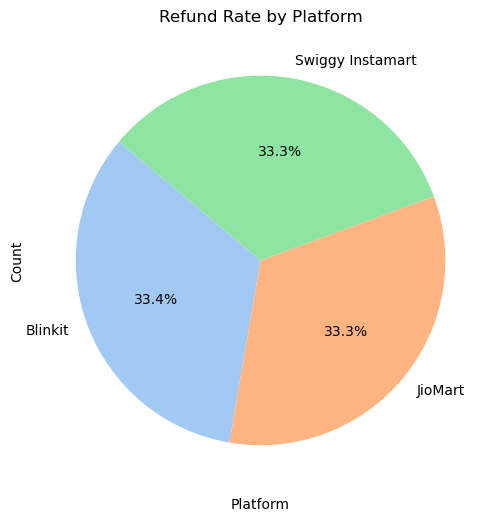

In [24]:
ed.refund_rate_by_platform()

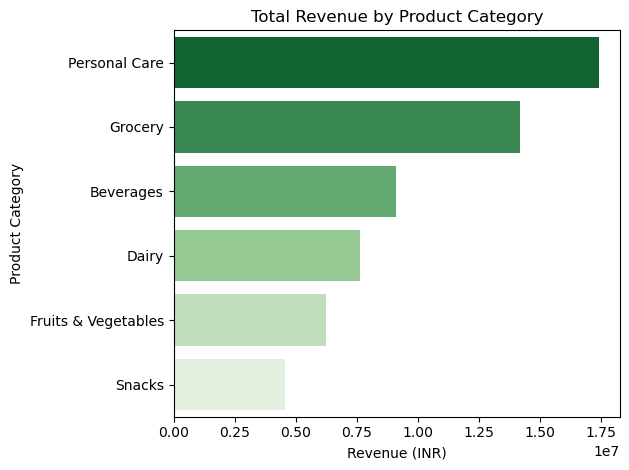

In [25]:
ed.plot_revenue_by_category()

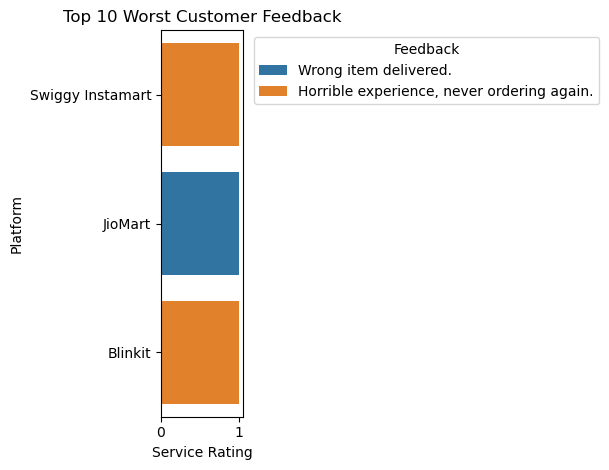

In [26]:
ed.plot_worst_feedback()

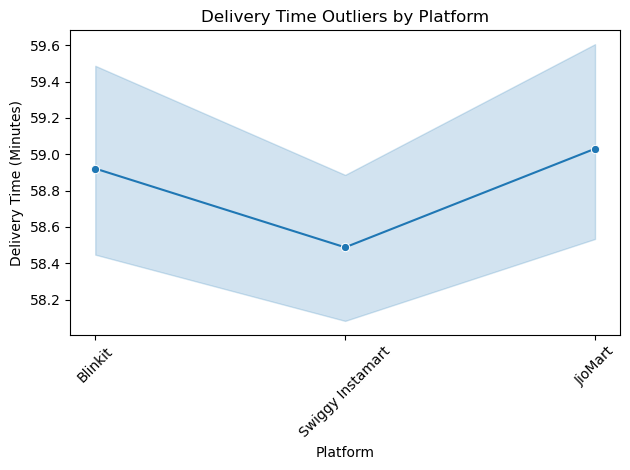

In [27]:
ed.plot_delivery_time_outliers()

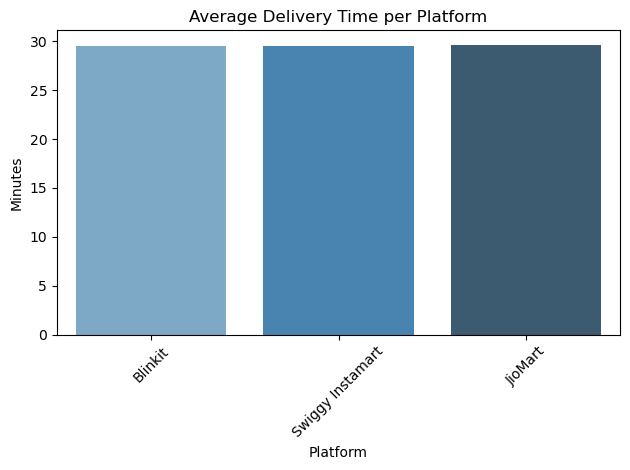

In [28]:
ed.plot_avg_delivery_time()

In [29]:
ed.get_data().to_csv('Cleaned_Ecommerce_Delivery_Analytics.csv', index = 'False')

In [30]:
for col,dtypes in ed.get_data().dtypes.items():
  print(col,dtypes)

Order ID object
Customer ID object
Platform object
Order Date & Time object
Delivery Time (Minutes) int64
Product Category object
Order Value (INR) int64
Customer Feedback object
Service Rating int64
Delivery Delay object
Refund Requested object
Sentiment object


In [31]:
def infer_sql_types(dtype):
  if pd.api.types.is_integer_dtype(dtype):
    return 'INT'
  elif pd.api.types.is_float_dtype(dtype):
    return 'FLOAT'
  elif pd.api.types.is_datetime64_any_dtype(dtype):
    return 'DATETIME'
  elif pd.api.types.is_bool_dtype(dtype):
    return 'BOOLEAN'
  else:
    return 'Text'
table_name = 'Ecommerce_Data'
columns = ed.get_data().dtypes
sql_columns = ",\n ".join([f'"{col}"{infer_sql_types(dtype)}' for col, dtype in columns.items()])

create_table_query = f"CREATE TABLE {table_name} (\n{sql_columns}\n);"
print(create_table_query)

CREATE TABLE Ecommerce_Data (
"Order ID"Text,
 "Customer ID"Text,
 "Platform"Text,
 "Order Date & Time"Text,
 "Delivery Time (Minutes)"INT,
 "Product Category"Text,
 "Order Value (INR)"INT,
 "Customer Feedback"Text,
 "Service Rating"INT,
 "Delivery Delay"Text,
 "Refund Requested"Text,
 "Sentiment"Text
);


In [32]:
!pip install sqlalchemy psycopg2-binary pandas

In [41]:
import psycopg2
import pandas as pd

df = ed.get_data()
df = df.where(pd.notnull(df), None)  # Replace NaNs with None for PostgreSQL

table_name = 'Ecommerce_Data'

try:
    conn = psycopg2.connect(
        dbname='postgres',
        user='postgres',
        password='postgres',
        host='127.0.0.1',
        port='5432'
    )
    cur = conn.cursor()

    for _, row in df.iterrows():
        values = tuple(row)
        placeholders = ', '.join(['%s'] * len(values))
        insert_query = f'INSERT INTO "{table_name}" VALUES ({placeholders})'
        cur.execute(insert_query, values)

    conn.commit()
    print("Data inserted successfully!")

except Exception as e:
    print(f"Insert failed: {e}")

finally:
    if 'cur' in locals() and not cur.closed:
        cur.close()
    if 'conn' in locals() and not conn.closed:
        conn.close()



Data inserted successfully!
